# Evaluating Patients’ Perspective on Metoclopramide (Maxolon) with Text Mining

## Selection of Drugs

Metoclopramide was randomly selected from the World Health Organization’s list of essential medicines. It is among the 100 most prescribed drugs in the USA with more than one million prescriptions per year. Metoclopramide is an antiemetic agent and dopamine D2 antagonist prescribed for gastrointestinal disorders. It is also used to treat migraine headaches. Common side effects of metoclopramide include tiredness, diarrhea, restlessness, depression and movement disorder like tardive dyskinesia.

## Selection of Data Sources

User reviews and other metadata on Metoclopramide are scraped from drugs.com and webmd.com. Drugs.com intended mainly for the USA market is owned and operated by the Drugsite Trust in New Zealand. It is the largest and most widely visited independent medicine information website on the internet. Drugs.com attracts more than 20 million visitors per month. Its peer reviewed drug information database is powered by several independent leading medical-information suppliers such as American Society of Health-System Pharmacists, Cerner Multum and IBM Watson Micromedex. Drugs.com also publishes health related content from Harvard Health Publications and Mayo Clinic. WebMD is an American corporation well known for its medical related publications such as patient directed health magazines and physician directed training materials and services such as Medscape. On average, WebMD attracts more than 175 million unique visitors per month. Both drugs.com and webmd.com have drug rankings and reviews written by patients.

## Scraping Drugs.com

Webscraper's (webscraper.io) Chrome browser extension was used for scraping Metoclopramide related user reviews from drugs.com. Metoclopramide has an average rating of 3.9 out of 10 from a total of 472 ratings on Drugs.com. According to Drugs.com 30% of reviewers reported a positive experience, while 62% reported a negative experience. The 472 user reviews on Drugs.com are accessible from https://www.drugs.com/comments/metoclopramide/. The dataset spans several paginated pages. A site map for https://www.drugs.com/comments/metoclopramide/?page=[1-19] was created with webscraper.io's visual site map builder.


## Metadata Analysis

In [16]:
import pandas as pd

url = 'https://raw.githubusercontent.com/lochana/pv/main/DrugsComA03FA01.csv'
df = pd.read_csv(url)
display (df)
df.isna().sum()

,web-scraper-order,web-scraper-start-url,name,duration,date,review,rating,likes
0,1653111937-312,https://www.drugs.com/comments/metoclopramide/...,Mrs. DJ,"January 26, 2016","January 26, 2016",Reglan (metoclopramide) for Nausea/Vomiting:\t...,1 / 10,16
1,1653111712-59,https://www.drugs.com/comments/metoclopramide/...,Lisa,Taken for 1 to 6 months,"January 11, 2022",For GERD:\t\t“This was so awful it gave me sid...,1 / 10,0
2,1653111774-118,https://www.drugs.com/comments/metoclopramide/...,Wheels 123,"September 8, 2016","September 8, 2016",Reglan (metoclopramide) for Lactation Augmenta...,10 / 10,3
3,1653111886-258,https://www.drugs.com/comments/metoclopramide/...,Red C.,Taken for less than 1 month,"April 30, 2014",Reglan (metoclopramide) for Migraine:\t\t“Had ...,2 / 10,15
4,1653111953-339,https://www.drugs.com/comments/metoclopramide/...,August Winterman,"January 23, 2017","January 23, 2017",Reglan (metoclopramide) for Nausea/Vomiting:\t...,10 / 10,16
...,...,...,...,...,...,...,...,...
470,1653111774-121,https://www.drugs.com/comments/metoclopramide/...,Tea,Taken for less than 1 month,"May 31, 2018",For Nausea/Vomiting:\t\t“Prescribed for mornin...,1 / 10,2
471,1653111805-174,https://www.drugs.com/comments/metoclopramide/...,Pattie4444,"February 21, 2017","February 21, 2017",For Migraine:\t\t“After suffering the worst mi...,7 / 10,5
472,1653111906-295,https://www.drugs.com/comments/metoclopramide/...,Jj22,Taken for 1 to 6 months,"October 9, 2019",For Nausea/Vomiting:\t\t“I take this Maxolon f...,10 / 10,7
473,1653111774-119,https://www.drugs.com/comments/metoclopramide/...,Norby,Taken for less than 1 month,"January 13, 2019",For Migraine:\t\t“I was administered 10mg of M...,1 / 10,2


web-scraper-order         0
web-scraper-start-url     0
name                      0
duration                  0
date                      0
review                    0
rating                   48
likes                     0
dtype: int64

3.9

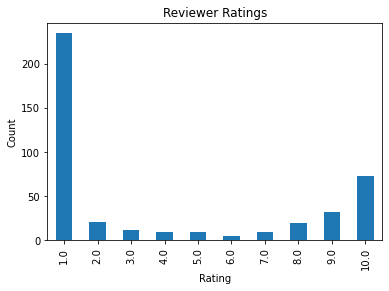

In [3]:
df['rating'].str.split("/").str[0].astype(float).value_counts().sort_index().plot(kind='bar', title="Reviewer Ratings", xlabel="Rating",ylabel="Count")
round(df['rating'].str.split("/").str[0].astype(float).mean(),1)

<AxesSubplot:>

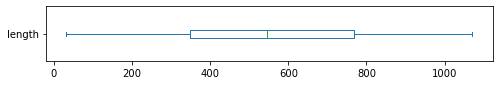

In [4]:
df['length'] = df['review'].str.len()
df['length'].plot(kind='box', vert=False, figsize=(8, 1))

## A Simple Text Processing Pipeline

In [5]:
import regex as re
import nltk
nltk.download('stopwords')

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*',text)

stopwords = set(nltk.corpus.stopwords.words('english'))
include_stopwords = {'reglan', 'metoclopramide', 'like', 'felt', 'iv', 'er'}
exclude_stopwords = {'against'}
stopwords |= include_stopwords
stopwords -= exclude_stopwords

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

df['tokens'] = df['review'].apply(prepare, pipeline=pipeline)
df['num_tokens'] = df['tokens'].map(len)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\locha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Word Frequency Analysis with Counters

In [6]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('migraine', 375), ('nausea', 325), ('vomiting', 263), ('side', 195), ('take', 186)]


In [7]:
def count_words(df, column='tokens', preprocess=None, min_freq=2):
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    return freq_df.sort_values('freq', ascending=False)

In [8]:
freq_df = count_words(df)
freq_df.head(10)

,freq
token,
migraine,375
nausea,325
vomiting,263
side,195
take,186
effects,174
given,166
anxiety,156
went,153


## Rerunning Counter with Preprocessing

In [9]:
# top words with 10+ characters
freq_df = count_words(df, column='review',
            preprocess=lambda text: re.findall(r"\w{10,}", text)).head(5)
freq_df.head(10)

,freq
token,
metoclopramide,358
medication,138
Gastroparesis,79
experience,68
prescribed,59


## Creating a Frequency Diagram

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

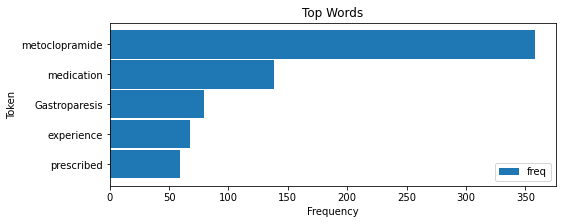

In [10]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(8,3))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

## Creating Word Clouds

(-0.5, 399.5, 199.5, -0.5)

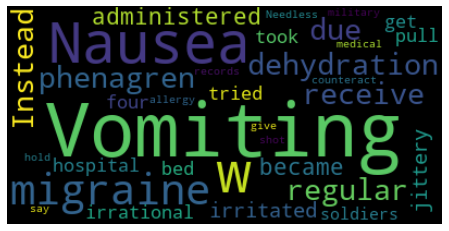

In [37]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
text = df.query("likes>=1")['review'].values[0]
plt.figure(figsize=(8, 4))
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
